In [144]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [145]:
df = pd.read_csv('StudentsPerformance.csv')

In [146]:
df.shape

(1000, 8)

In [147]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [148]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [149]:
df= df.rename(columns = {
    'race/ethnicity':'race',
    'parental level of education':'parental_level_of_education',
    'test preparation course':'test_preparation_course',
    'math score':'math_score',
    'reading score':'reading_score',
    'writing score':'writing_score'
})

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race                         1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [151]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [152]:
df.isnull().sum()

gender                         0
race                           0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [153]:
df.duplicated().sum()

0

In [154]:
def cat_count(col):
    return col.value_counts()
    
    

In [155]:
cat_count(df.gender)

gender
female    518
male      482
Name: count, dtype: int64

In [156]:
cat_count(df.race)

race
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [157]:
cat_count(df.parental_level_of_education)

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [158]:
cat_count(df.lunch)

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [159]:
cat_count(df.test_preparation_course)

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

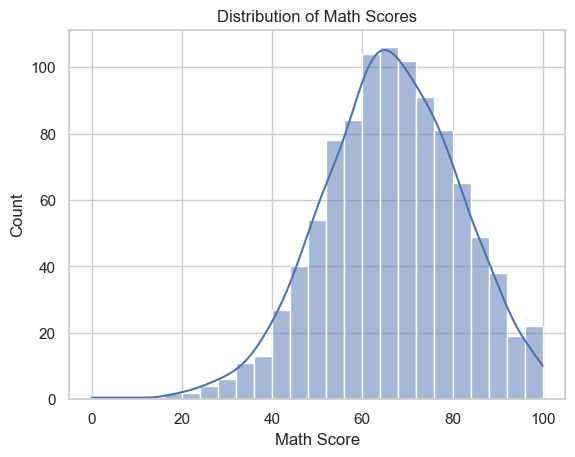

In [193]:
sns.histplot(data= df ,x='math_score',kde = True)
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.grid(True)
plt.ylabel('Count')
plt.show()

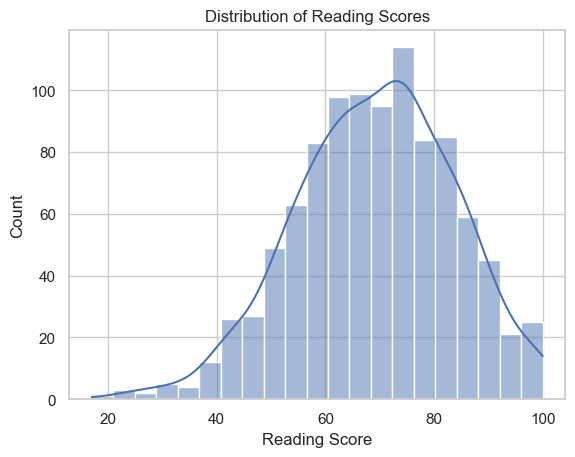

In [194]:
sns.histplot(data= df ,x='reading_score',kde = True)
plt.title('Distribution of Reading Scores')
plt.xlabel('Reading Score')
plt.grid(True)
plt.ylabel('Count')
plt.show()

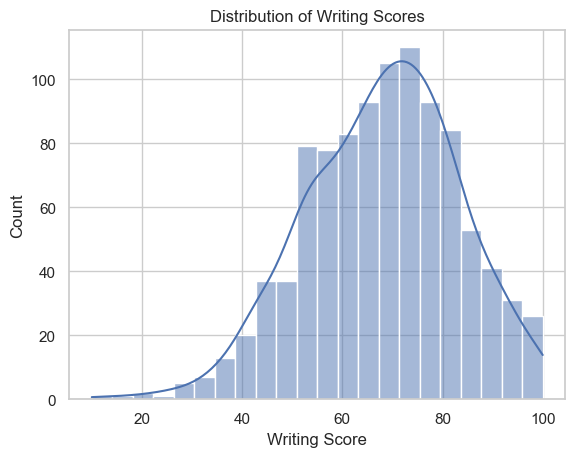

In [195]:
sns.histplot(data= df ,x='writing_score',kde = True)
plt.title('Distribution of Writing Scores')
plt.xlabel('Writing Score')
plt.grid(True)
plt.ylabel('Count')
plt.show()

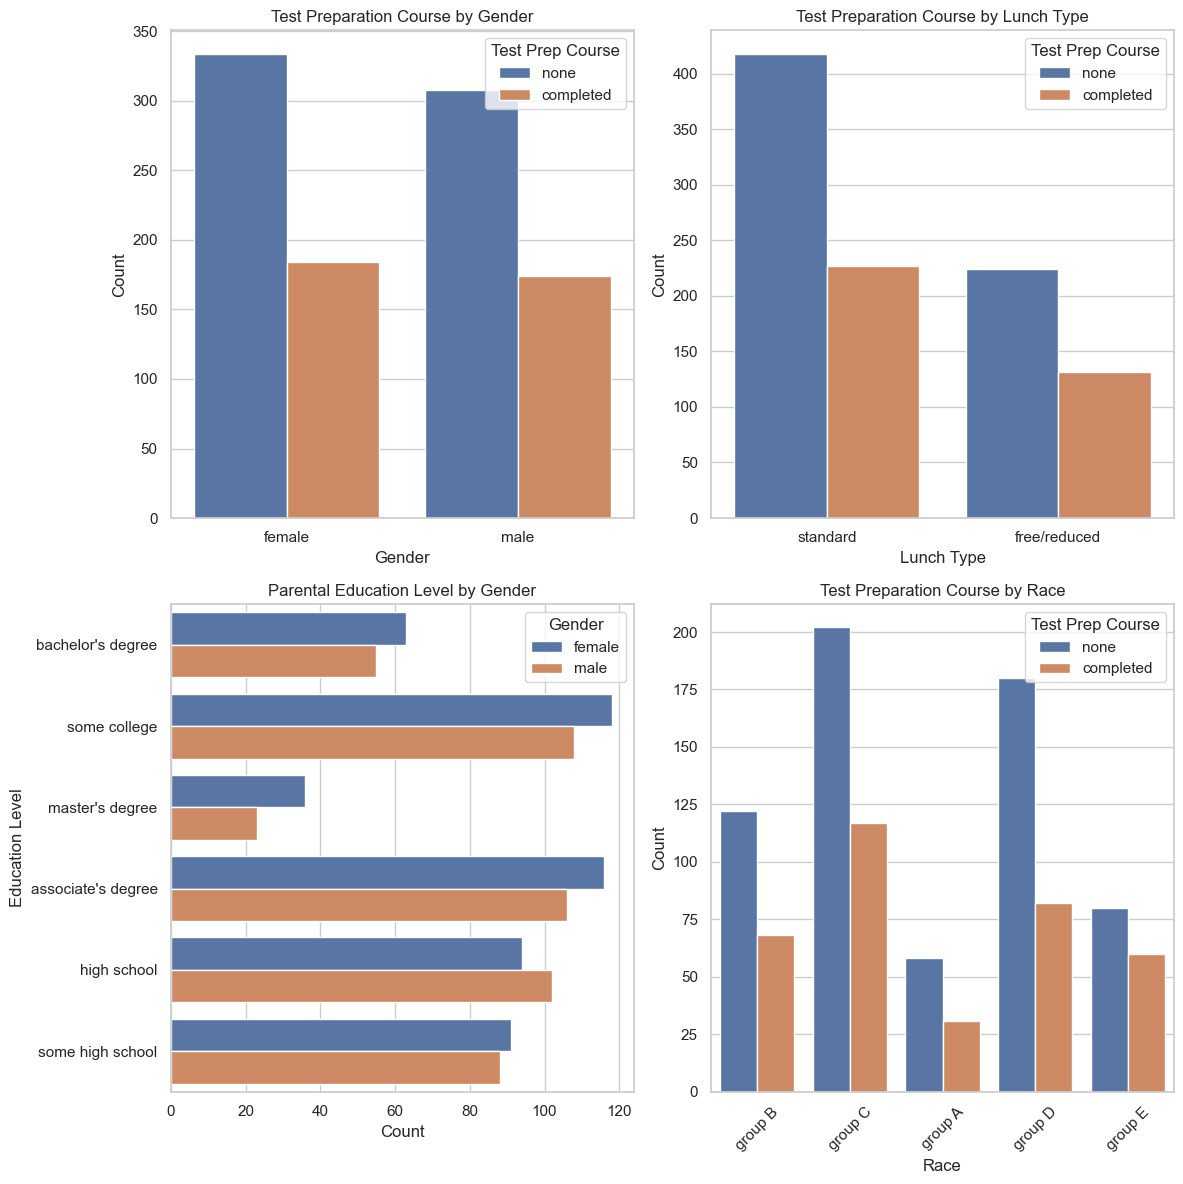

In [197]:
plt.figure(figsize=(12,12))

plt.subplot(2, 2, 1)
sns.countplot(data=df, x='gender', hue='test_preparation_course')
plt.title('Test Preparation Course by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Test Prep Course')

plt.subplot(2, 2, 2)
sns.countplot(data=df, x='lunch', hue='test_preparation_course')
plt.title('Test Preparation Course by Lunch Type')
plt.xlabel('Lunch Type')
plt.ylabel('Count')
plt.legend(title='Test Prep Course')

plt.subplot(2, 2, 3)
sns.countplot(data=df, y='parental_level_of_education', hue='gender')
plt.title('Parental Education Level by Gender')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.legend(title='Gender')

plt.subplot(2, 2, 4)
sns.countplot(data=df, x='race', hue='test_preparation_course')
plt.title('Test Preparation Course by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Test Prep Course')

plt.tight_layout()
plt.show()


### 1. Which parental education level is linked with the highest average math score?

In [167]:
 df.groupby("parental_level_of_education")['math_score'].mean().sort_values(ascending = False)


parental_level_of_education
master's degree       69.745763
bachelor's degree     69.389831
associate's degree    67.882883
some college          67.128319
some high school      63.497207
high school           62.137755
Name: math_score, dtype: float64

### 2. Is there a significant score difference between males and females across all subjects?

In [168]:
 df.groupby('gender')[['math_score','reading_score','writing_score']].mean()


,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


### 3. How much does completing the test preparation course improve performance in each subject?

In [169]:
df.groupby('test_preparation_course')[['math_score','reading_score','writing_score']].mean()

,math_score,reading_score,writing_score
test_preparation_course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


### Which combination of gender, lunch type, and test preparation status produces the top 10% of scores?

In [170]:
df['average_score']=df[['math_score','reading_score','writing_score']].mean(axis = 1)

In [171]:
top_10 =df[df['average_score']>= df['average_score'].quantile(0.90)]
top_10.groupby(['lunch','gender','test_preparation_course']).size().sort_values(ascending= False)

lunch         gender  test_preparation_course
standard      female  none                       31
                      completed                  29
              male    completed                  20
                      none                        9
free/reduced  female  completed                   6
              male    completed                   3
              female  none                        2
              male    none                        2
dtype: int64

In [172]:
Does lunch type have a uniform impact across all race/ethnicity groups, or does its effect vary?

Object `vary` not found.


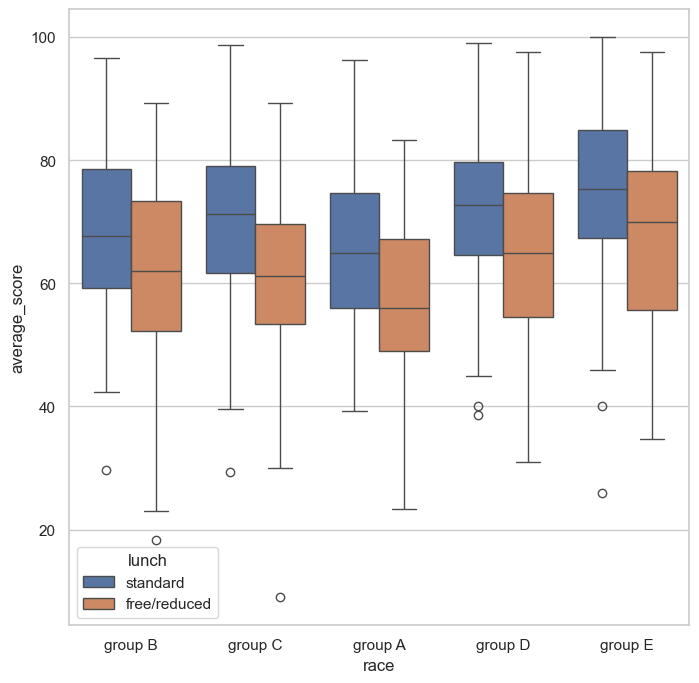

In [173]:
plt.figure(figsize=(8,8))
sns.boxplot(data = df,x='race',y='average_score',hue='lunch')
plt.show()

### 6. What is the correlation between reading and writing scores? Is it stronger than math and writing?

In [174]:
corr_readd_write= df['reading_score'].corr(df['writing_score'])
corr_read_write

0.954598077146248

In [175]:
corr_math_write = df['math_score'].corr(df['writing_score'])
corr_math_write

0.8026420459498085

In [176]:
print("Correlation between Reading and Writing:", corr_read_write)
print("Correlation between Math and Writing:", corr_math_write)


Correlation between Reading and Writing: 0.954598077146248
Correlation between Math and Writing: 0.8026420459498085


### Identify the top 5% performing students and analyze their demographic profiles. What patterns emerge?

In [177]:
top_5 =df[ df['average_score'] >=df['average_score'].quantile(0.95)]


In [178]:
df.head(2)

,gender,race,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333


In [179]:
top_5_gender = top_5['gender'].value_counts()
top_5_gender

gender
female    36
male      14
Name: count, dtype: int64

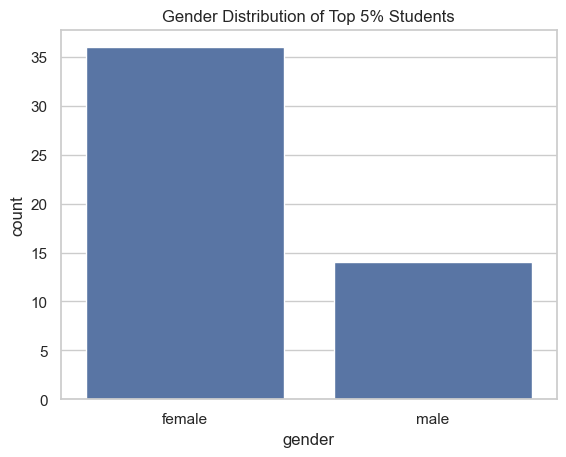

In [180]:
sns.countplot(data = top_5,x='gender')
plt.title('Gender Distribution of Top 5% Students')
plt.show()

In [181]:
top_5_race = top_5['race'].value_counts()
top_5_race

race
group E    14
group C    13
group D    12
group B     7
group A     4
Name: count, dtype: int64

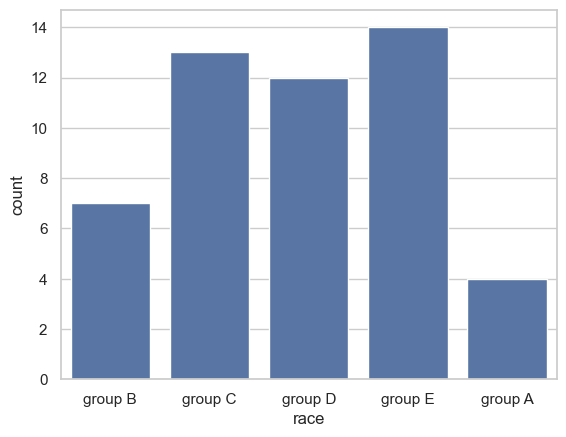

In [182]:
sns.countplot(data = top_5,x='race')
plt.show()

In [183]:
top_5_parental = top_5['parental_level_of_education'].value_counts()
top_5_parental

parental_level_of_education
associate's degree    16
bachelor's degree     13
some college          10
master's degree        6
some high school       3
high school            2
Name: count, dtype: int64

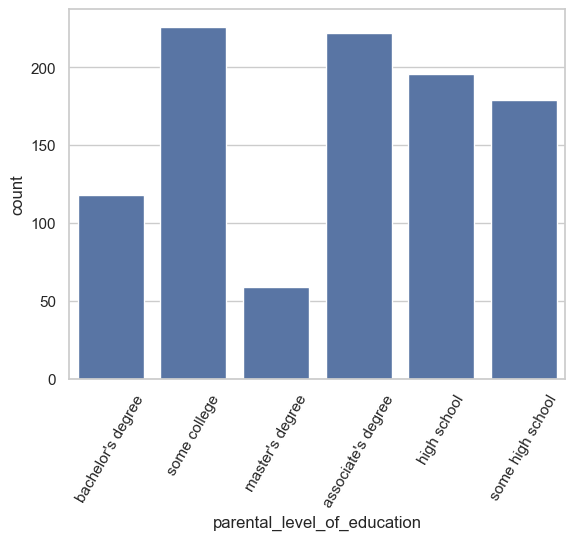

In [184]:
sns.countplot(data = df,x='parental_level_of_education')
plt.xticks(rotation=60)

plt.show()

In [185]:
top_5_lunch = top_5['lunch'].value_counts()
top_5_lunch

lunch
standard        46
free/reduced     4
Name: count, dtype: int64

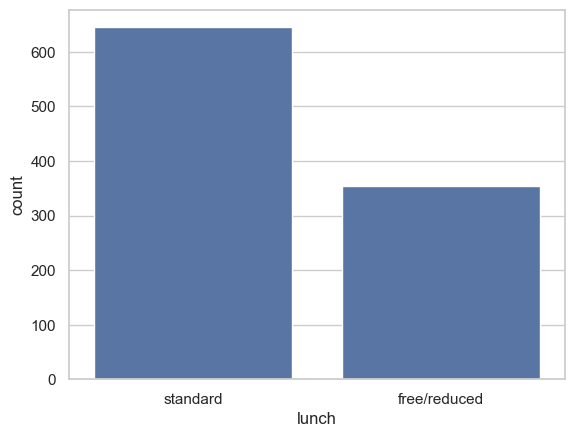

In [186]:
sns.countplot(data = df,x='lunch')
plt.show()

In [187]:
top_5_test = top_5['test_preparation_course'].value_counts()
top_5_test

test_preparation_course
completed    33
none         17
Name: count, dtype: int64

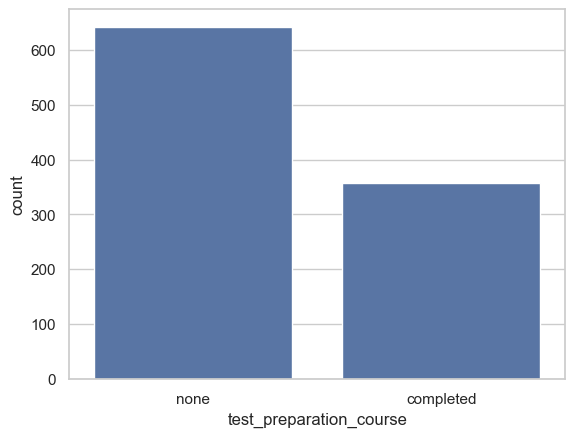

In [188]:
sns.countplot(data = df,x='test_preparation_course')
plt.show()

### Can we cluster students into performance categories (e.g., low, medium, high performers) using justPandas logic? If yes, how?

In [189]:
bins = [0,60,80,100]
labels = ['Low','Medium','High']
df['Performance_category']=pd.cut(df['average_score'],bins = bins,labels = labels,include_lowest= True)

In [190]:
df.Performance_category.value_counts()

Performance_category
Medium    513
Low       293
High      194
Name: count, dtype: int64

In [191]:
df.groupby('Performance_category')[['math_score', 'reading_score', 'writing_score']].mean()


C:\Users\JUNAID TANOLI\AppData\Local\Temp\ipykernel_8768\3160069998.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Performance_category')[['math_score', 'reading_score', 'writing_score']].mean()


,math_score,reading_score,writing_score
Performance_category,,,
Low,49.484642,52.102389,50.191126
Medium,68.294347,71.608187,70.789474
High,85.335052,88.494845,87.798969


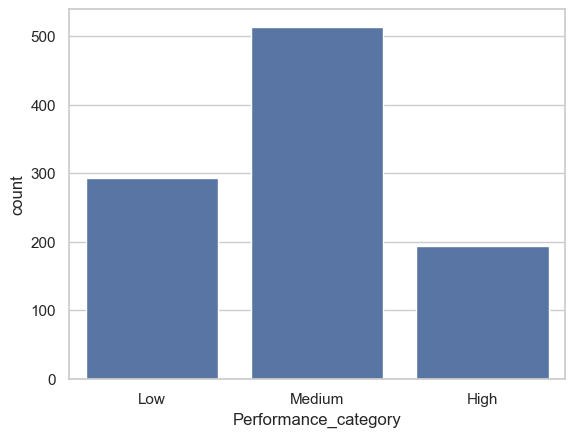

In [192]:
sns.countplot(data = df,x='Performance_category')
plt.show()